# Выпуская квалификационная работа Егора Проскурина

## Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов). 



# Выпуская квалификационная работа Егора Проскурина

## Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов). 

In [555]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler


Считываем исходные данные, и проверяем их размерность

In [523]:
bp = pd.read_excel('/home/jorik/dev/data/vkr/X_bp.xlsx', index_col=[0])
bp.shape

(1023, 10)

In [524]:
nup = pd.read_excel('/home/jorik/dev/data/vkr/X_nup.xlsx', index_col=[0])
nup.shape

(1040, 3)

In [525]:
# Объединяем считанные данные в один датасет по индексам, используя inner join
df = pd.concat([bp, nup], axis=1, join='inner')
df.shape

(1023, 13)

Первичный анализ данных

In [526]:
# посмотрим содержимое датасета
df.sample(5).T

386          213          324  \
Соотношение матрица-наполнитель          2.728816     3.019957     2.223337   
Плотность, кг/м3                      2075.898989  1899.218029  1929.584696   
модуль упругости, ГПа                  893.887158  1025.931930   444.184402   
Количество отвердителя, м.%            134.850126   125.984806   123.687384   
Содержание эпоксидных групп,%_2         20.163735    21.457780    20.520041   
Температура вспышки, С_2               303.930764   279.017391   292.678638   
Поверхностная плотность, г/м2          271.669943   160.421456   469.436557   
Модуль упругости при растяжении, ГПа    72.623384    73.399395    71.090775   
Прочность при растяжении, МПа         3003.335579  2603.888835  1908.203759   
Потребление смолы, г/м2                354.958088   299.197628   216.479290   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              9.160705     4.003852     9.511737   
Плотность нашивки                       84.310765    59.796446    58.196301   

                                              866          925  
Соотношение матрица-наполнитель          4.487538     0.827016  
Плотность, кг/м3                      2038.194186  1920.051313  
модуль упругости, ГПа                  790.210119   753.465777  
Количество отвердителя, м.%            105.304125   106.790625  
Содержание эпоксидных групп,%_2         19.848828    21.203769  
Температура вспышки, С_2               270.679400   270.244342  
Поверхностная плотность, г/м2          451.309770   260.479216  
Модуль упругости при растяжении, ГПа    77.061555    74.995439  
Прочность при растяжении, МПа         1851.186556  1646.220592  
Потребление смолы, г/м2                240.185215   188.628413  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.094292     6.231992  
Плотность нашивки                       64.798783    59.239052

In [527]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [529]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [530]:
df['Угол нашивки, град'] .unique()

array([ 0, 90])

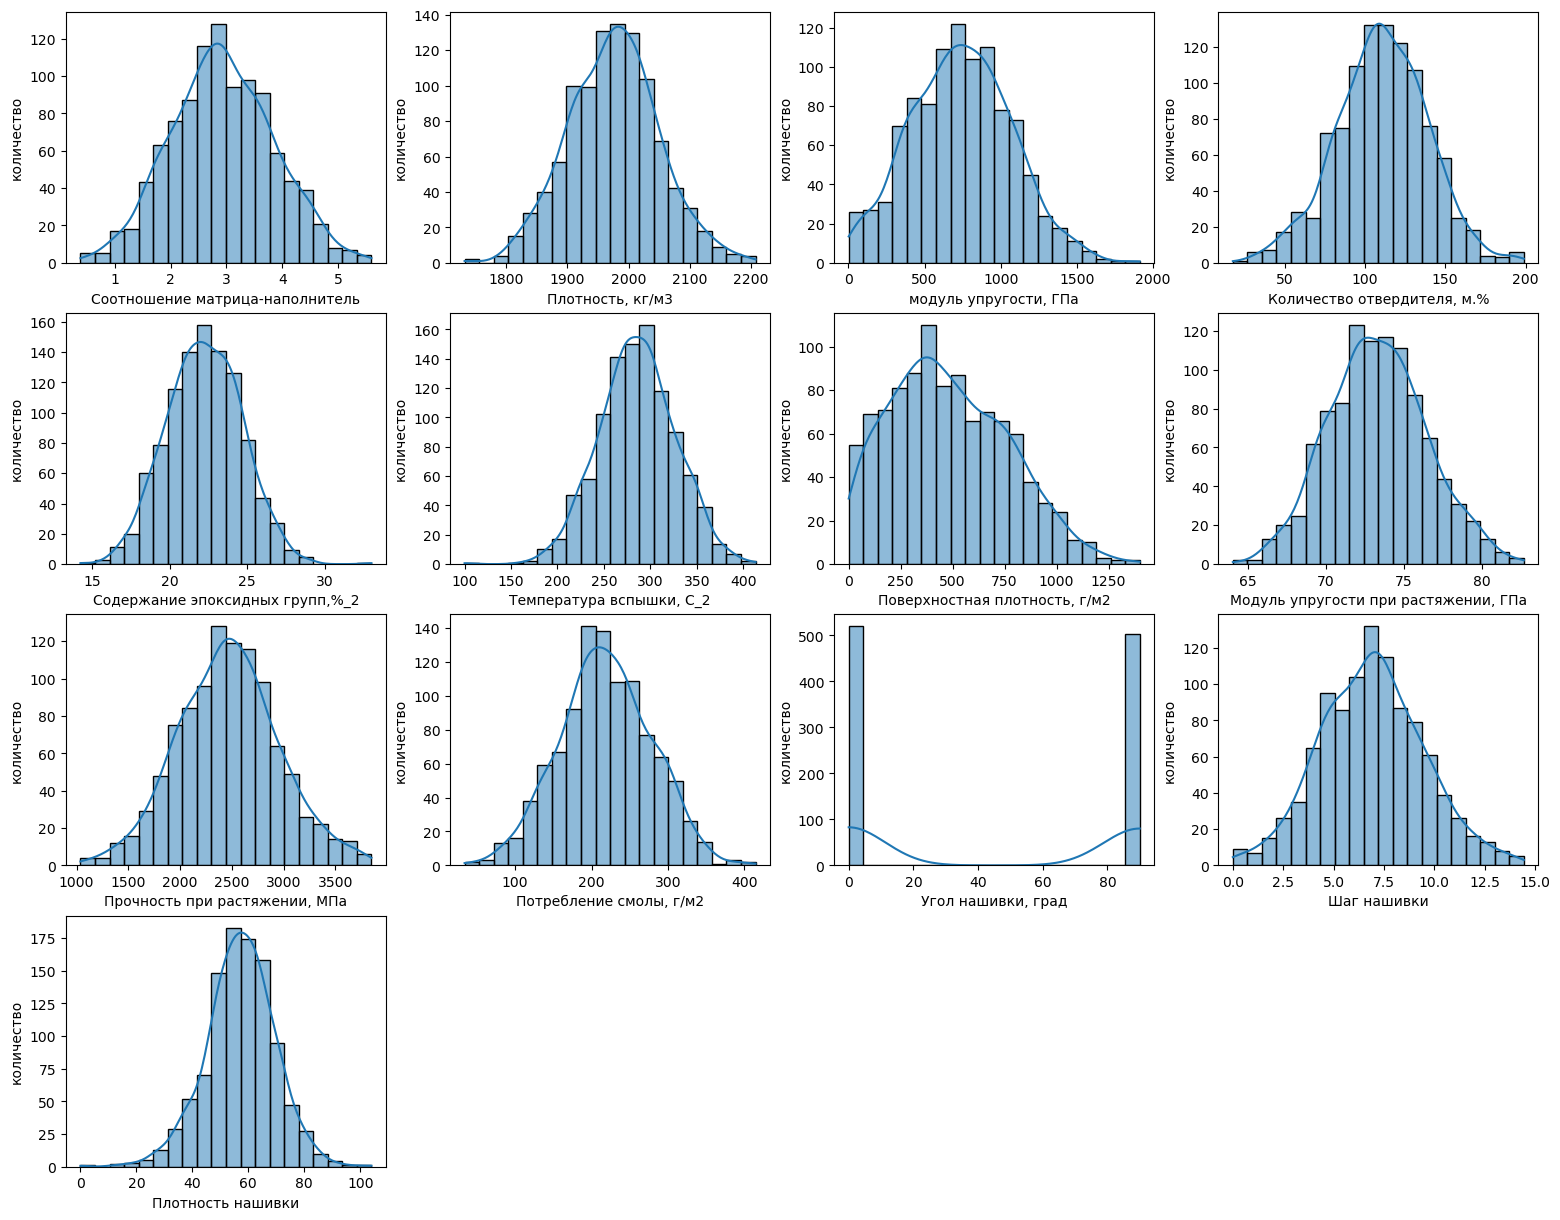

In [531]:
fig = plt.figure(figsize=(19, 15))

for number, column in enumerate(df.columns):
    plt.subplot(4, 4, number+1)
    plt.ylabel('количество')
    sns.histplot(df[column], kde=True, bins=20)
    # plt.title(column)
plt.show()


Видим отсутствие пропусков. Большинство признаков (кроме угла нашивки) имеют большое число уникальных значений. 
Оценим степень линейной зависимости целевых признаков от остальных:

In [532]:
df.corr()['модуль упругости, ГПа'].sort_values()

Угол нашивки, град                     -0.025417
Шаг нашивки                            -0.009875
Плотность, кг/м3                       -0.009647
Содержание эпоксидных групп,%_2        -0.006804
Поверхностная плотность, г/м2          -0.005306
Потребление смолы, г/м2                 0.001840
Модуль упругости при растяжении, ГПа    0.023267
Количество отвердителя, м.%             0.024049
Температура вспышки, С_2                0.031174
Соотношение матрица-наполнитель         0.031700
Прочность при растяжении, МПа           0.041868
Плотность нашивки                       0.056346
модуль упругости, ГПа                   1.000000
Name: модуль упругости, ГПа, dtype: float64

In [533]:
df.corr()['Прочность при растяжении, МПа'].sort_values()

Количество отвердителя, м.%            -0.075375
Плотность, кг/м3                       -0.069981
Шаг нашивки                            -0.059547
Температура вспышки, С_2               -0.031763
Содержание эпоксидных групп,%_2        -0.023899
Модуль упругости при растяжении, ГПа   -0.009009
Поверхностная плотность, г/м2          -0.003210
Плотность нашивки                       0.019604
Угол нашивки, град                      0.023398
Соотношение матрица-наполнитель         0.024148
Потребление смолы, г/м2                 0.028602
модуль упругости, ГПа                   0.041868
Прочность при растяжении, МПа           1.000000
Name: Прочность при растяжении, МПа, dtype: float64

Не обнаруживаем значимых линейных корреляций признаков c целевыми.
Визуализируем датасет с помощью парной диаграммы. 

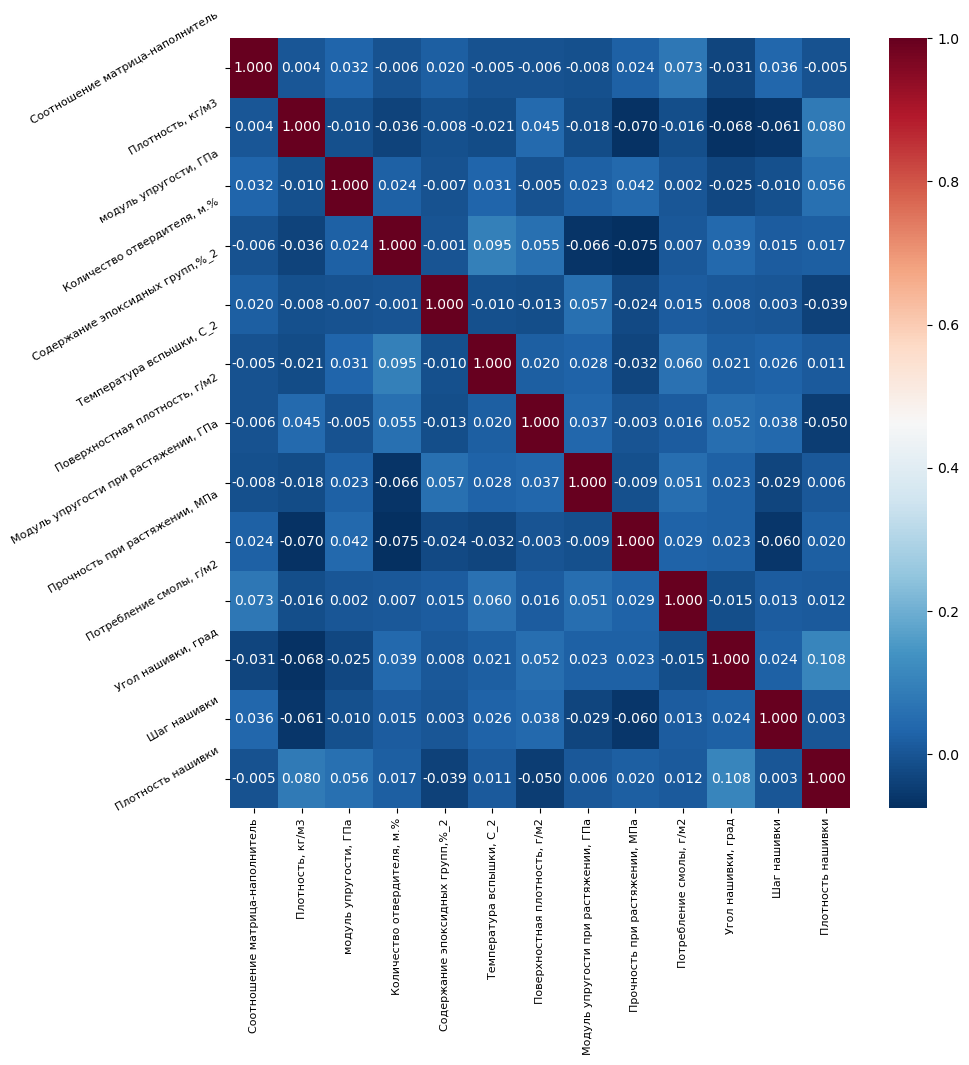

In [534]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap = 'RdBu_r', fmt='.3f')
plt.yticks(rotation=30, fontsize=8)
plt.xticks(fontsize=8)
plt.show()

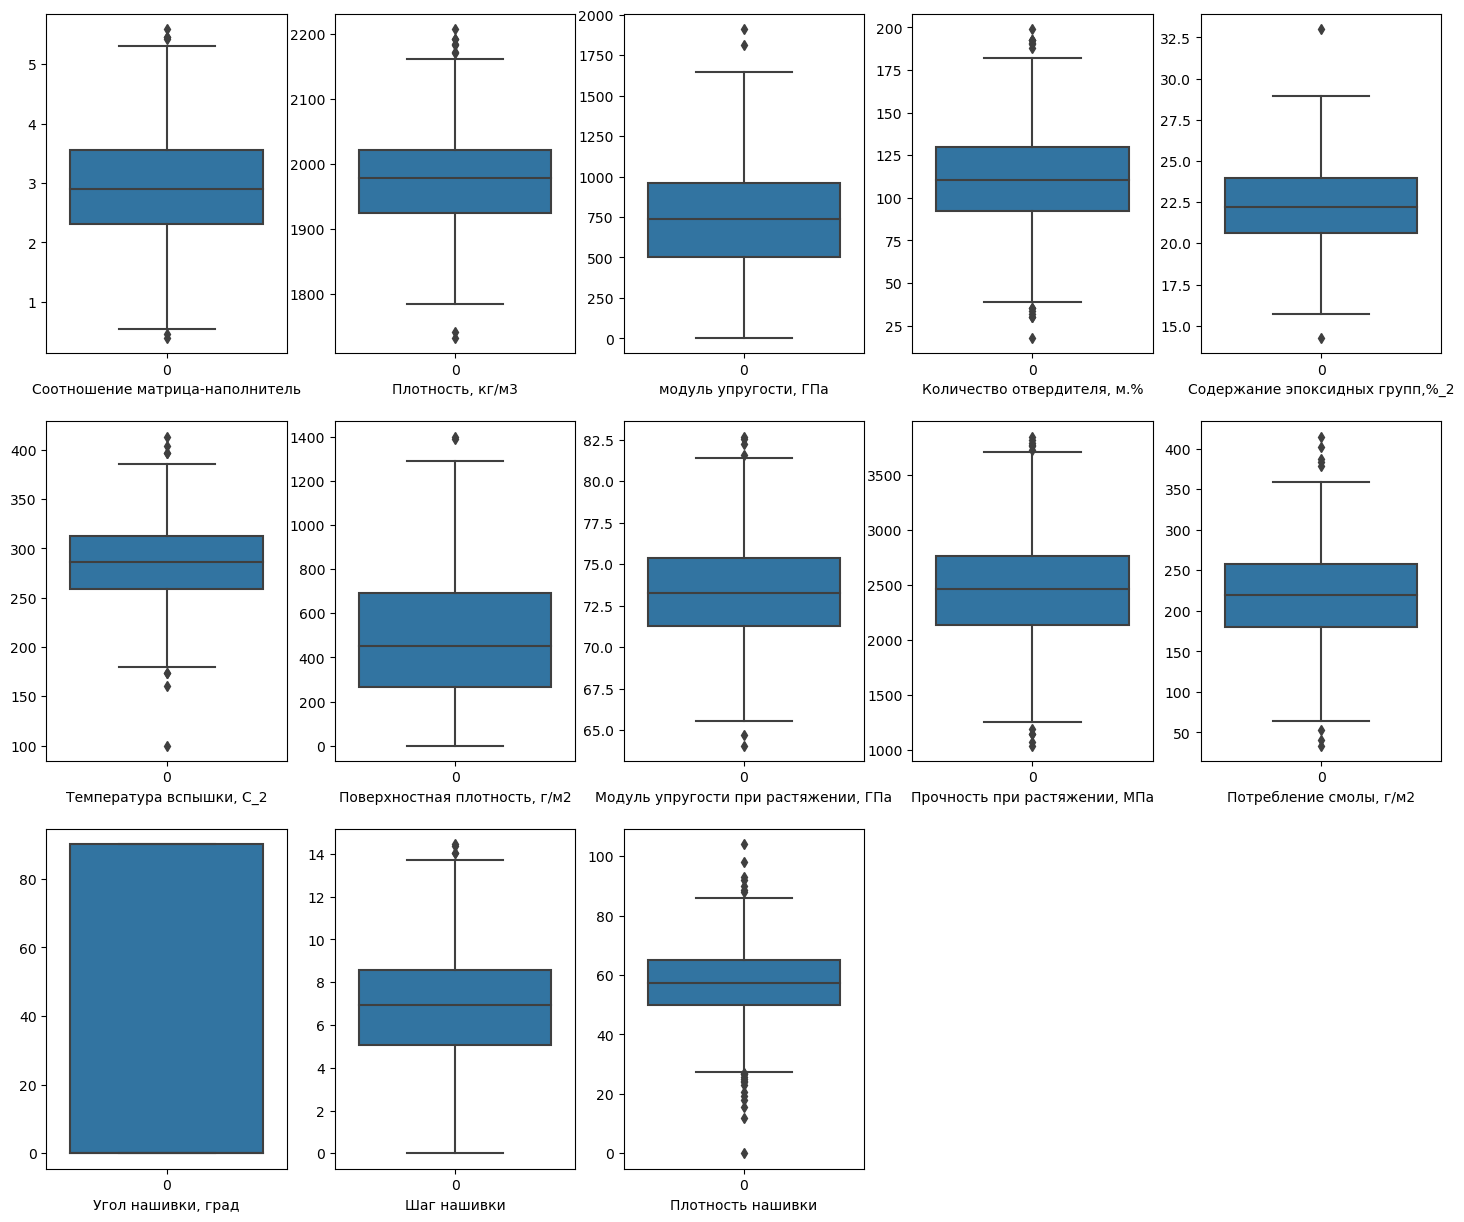

In [535]:
fig = plt.figure(figsize=(18,15))

for number, column in enumerate(df.columns):
    plt.subplot(3, 5, number+1)
    plt.xlabel(column)
    sns.boxplot(data=df[column])
plt.show()

In [536]:
sns.pairplot(data=df, height=3, diag_kind='kde', size=2)

/home/jorik/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


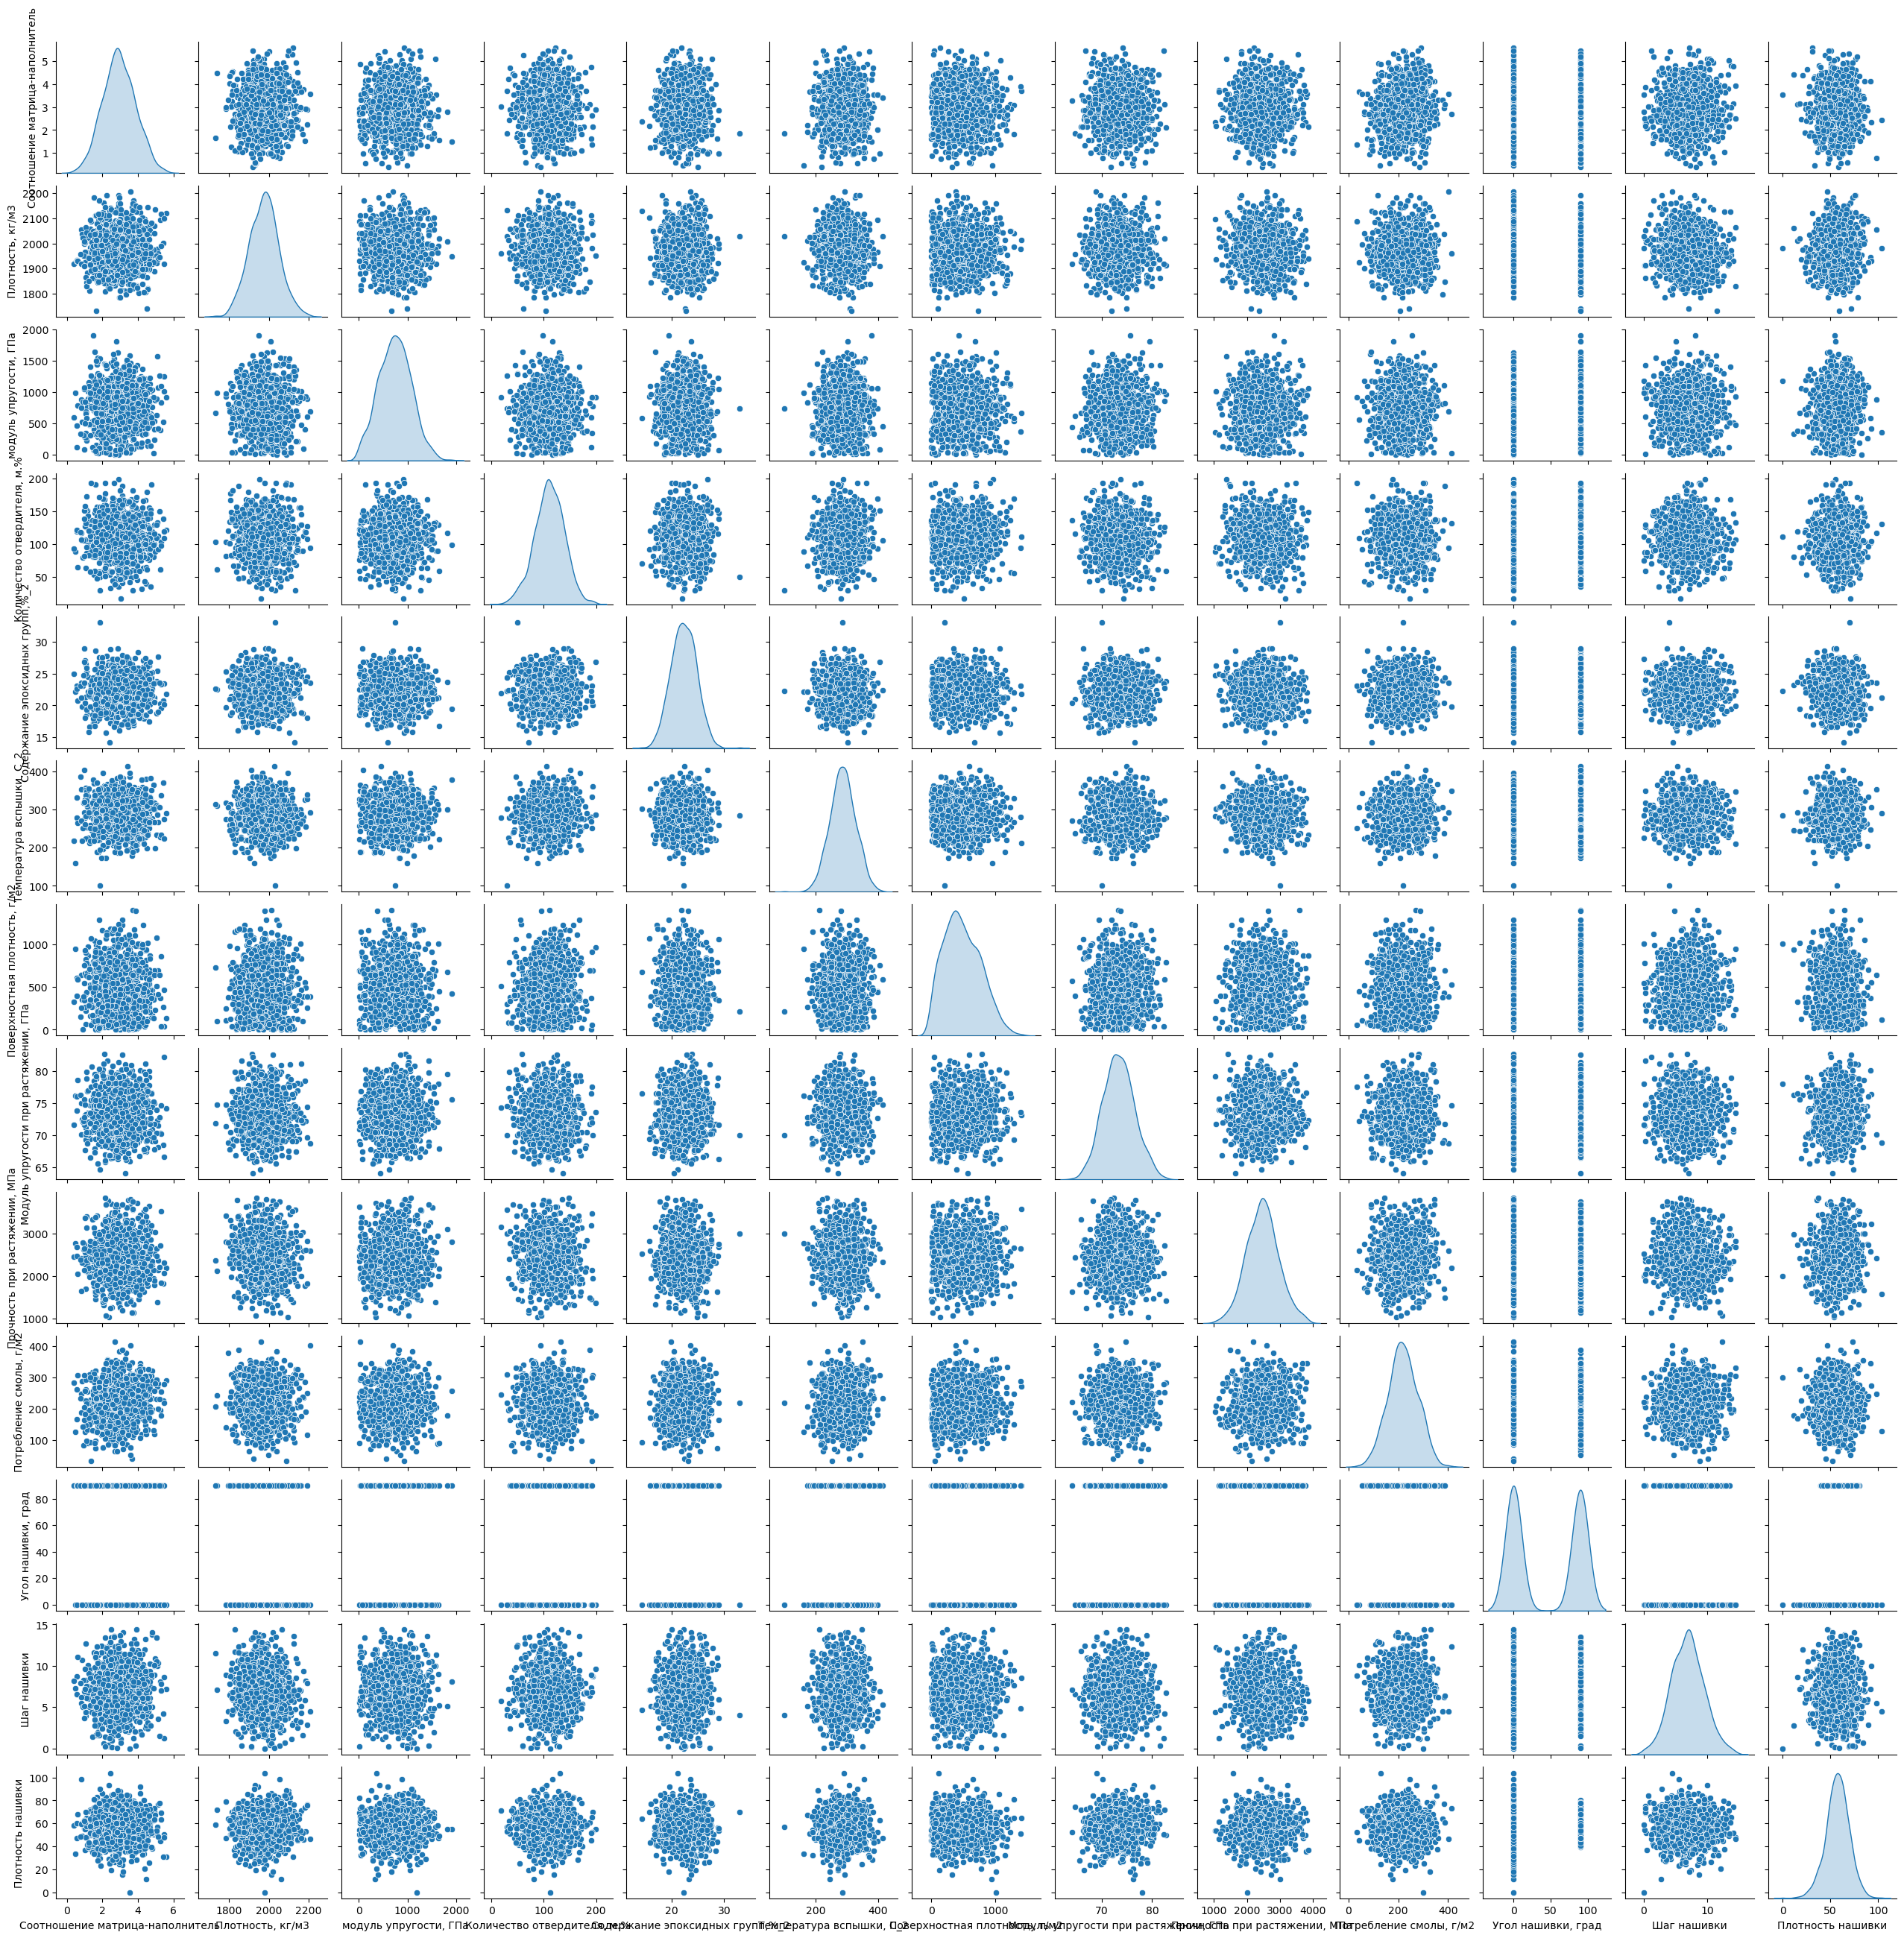

In [537]:
plt.show()

In [538]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

Визуальный анализ диаграммы свидетельствует об отсутствии статистически значимых корреляций признаков. Распределения как отдельных признаков, так и парных корреляций признаков имеют высокую степень сходства с нормальным распределением. 



Препроцессинг данных

In [539]:
# удаляем выбросы методом межквартильного расстояния
Q1, Q3 = df.quantile(q=.25), df.quantile(q=.75)
IQR = Q3 - Q1
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df.shape

(936, 13)

Препроцессинг данных.

In [540]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns)

scaled_df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       936.000000        936.000000   
mean                          0.498933          0.502695   
std                           0.187489          0.187779   
min                           0.000000          0.000000   
25%                           0.372274          0.368517   
50%                           0.494538          0.511229   
75%                           0.629204          0.624999   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             936.000000                   936.000000   
mean                0.446764                     0.504664   
std                 0.199583                     0.188865   
min                 0.000000                     0.000000   
25%                 0.301243                     0.376190   
50%                 0.447061                     0.506040   
75%                 0.580446                     0.637978   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       936.000000                936.000000   
mean                          0.491216                  0.516059   
std                           0.180620                  0.190624   
min                           0.000000                  0.000000   
25%                           0.367716                  0.386128   
50%                           0.489382                  0.515980   
75%                           0.623410                  0.646450   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     936.000000                            936.000000   
mean                        0.373733                              0.488647   
std                         0.217078                              0.191466   
min                         0.000000                              0.000000   
25%                         0.205619                              0.359024   
50%                         0.354161                              0.485754   
75%                         0.538683                              0.615077   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     936.000000               936.000000   
mean                        0.495706                 0.521141   
std                         0.188915                 0.195781   
min                         0.000000                 0.000000   
25%                         0.365149                 0.392067   
50%                         0.491825                 0.523766   
75%                         0.612874                 0.652447   
max                         1.000000                 1.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          936.000000   936.000000         936.000000  
mean             0.511752     0.502232           0.513776  
std              0.500129     0.183258           0.191342  
min              0.000000     0.000000           0.000000  
25%              0.000000     0.372211           0.390482  
50%              1.000000     0.504258           0.516029  
75%              1.000000     0.624604           0.638842  
max              1.000000     1.000000           1.000000

In [541]:
# проверка распределений на нормальность
for column in scaled_df.columns:
    stat, p = scipy.stats.shapiro(scaled_df[column])
    # print(f'{column:37s}{p}')
    if p < 0.05:
        #print(f'Нет оснований отвергать гипотезу о нормальном распределении "{column}" ({p=})')
    #else:
        print(f'Отклоняем гипотезу о нормальности для "{column}" ({p=})') 

Отклоняем гипотезу о нормальности для "модуль упругости, ГПа" (p=0.00608981866389513)
Отклоняем гипотезу о нормальности для "Количество отвердителя, м.%" (p=0.025072956457734108)
Отклоняем гипотезу о нормальности для "Поверхностная плотность, г/м2" (p=8.982300320203862e-11)
Отклоняем гипотезу о нормальности для "Модуль упругости при растяжении, ГПа" (p=0.02307090349495411)
Отклоняем гипотезу о нормальности для "Потребление смолы, г/м2" (p=0.015667347237467766)
Отклоняем гипотезу о нормальности для "Угол нашивки, град" (p=1.6269355430503991e-40)


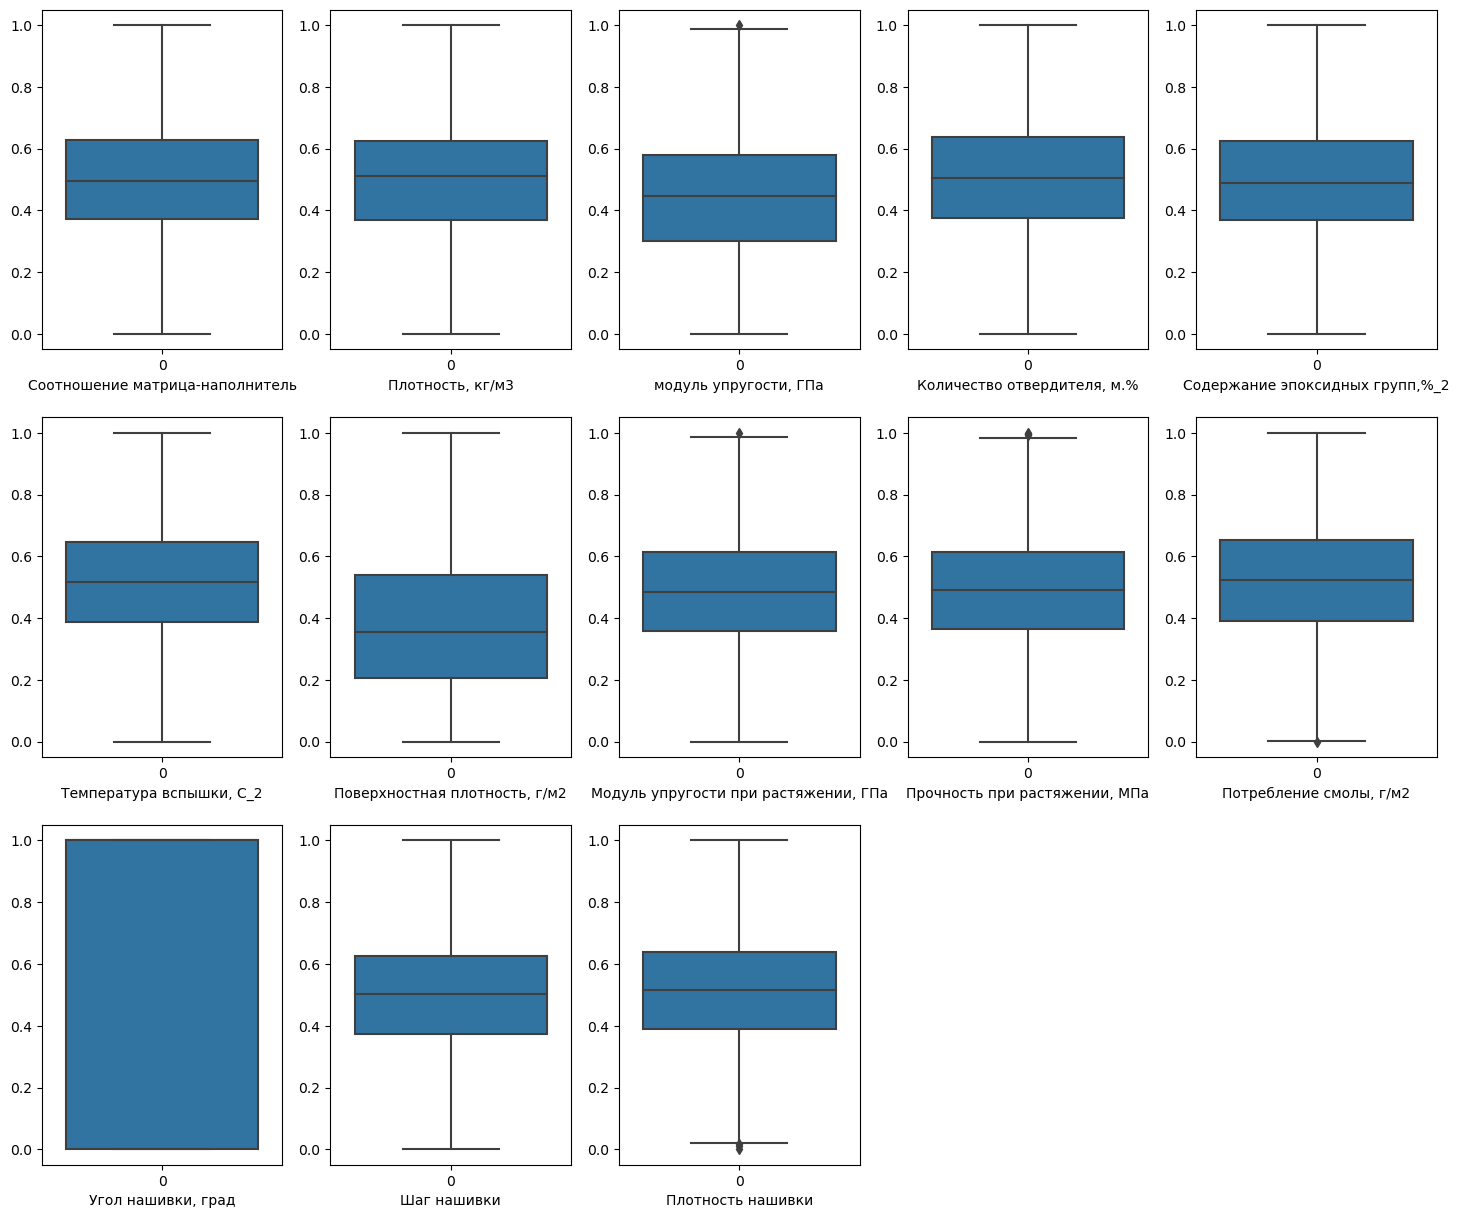

In [542]:
# построим боксплот нормализованных признаков
fig = plt.figure(figsize=(18,15))

for number, column in enumerate(scaled_df.columns):
    plt.subplot(3, 5, number+1)
    plt.xlabel(column)
    sns.boxplot(data=scaled_df[column])
plt.show()

Разделяем данные

In [543]:
y_elasticy = scaled_df['модуль упругости, ГПа']
y_strength = scaled_df['Прочность при растяжении, МПа']

scaled_df.drop(['модуль упругости, ГПа', 'Прочность при растяжении, МПа'], axis=1, inplace=True)

X_elasticy_train, X_elasticy_test, y_elasticy_train, y_elasticy_test = train_test_split(scaled_df, y_elasticy, test_size=0.3, random_state=42)
X_strength_train, X_strength_test, y_strength_train, y_strength_test = train_test_split(scaled_df, y_strength, test_size=0.3, random_state=42)



Cлучайный лес (Random Forest)

In [643]:

# модуль упругости

grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [None, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

regressor_elasticy = GridSearchCV(RandomForestRegressor(), grid, cv=5, )

regressor_elasticy.fit(X_elasticy_train, y_elasticy_train)

rf_elasticy_params = regressor_elasticy.best_params_

y_predict = regressor_elasticy.predict(X_elasticy_test)

rf_elasticy_scores = {
    'mae': mean_absolute_error(y_elasticy_test, y_predict),
    'mse': mean_squared_error(y_elasticy_test, y_predict),
    'r2': r2_score(y_elasticy_test, y_predict),
}

print(f'mae={rf_elasticy_scores["mae"]}')
print(f'mse={rf_elasticy_scores["mse"]}')
print(f'r2={rf_elasticy_scores["r2"]}')



mae=0.16188422758184245
mse=0.041752472201262304
r2=-0.026494018892525784


In [567]:
# прочность при растяжении

grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [None, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

rf_regressor_strength = GridSearchCV(RandomForestRegressor(), grid, cv=5, )

rf_regressor_strength.fit(X_strength_train, y_strength_train)

rf_strength_params = rf_regressor_strength.best_params_

y_predict = rf_regressor_strength.predict(X_strength_test)

rf_strength_scores = {
    'mae': mean_absolute_error(y_strength_test, y_predict),
    'mse': mean_squared_error(y_strength_test, y_predict),
    'r2': r2_score(y_strength_test, y_predict),
}

print(f'mae={rf_strength_scores["mae"]}')
print(f'mse={rf_strength_scores["mse"]}')
print(f'r2={rf_strength_scores["r2"]}')

mae=0.1481732969044582
mse=0.035558382698160314
r2=-0.05023719880352129


Метод ближайших соседей (K-Neighbors)

In [568]:
# модуль упругости

kn_regressor_elasticy = KNeighborsRegressor(n_neighbors=30)
kn_regressor_elasticy.fit(X_elasticy_train, y_elasticy_train)

y_predict = kn_regressor_elasticy.predict(X_elasticy_test)

kn_elasticy_scores = {
    'mae': mean_absolute_error(y_elasticy_test, y_predict),
    'mse': mean_squared_error(y_elasticy_test, y_predict),
    'r2': r2_score(y_elasticy_test, y_predict),
}

print(f'mae={kn_elasticy_scores["mae"]}')
print(f'mse={kn_elasticy_scores["mse"]}')
print(f'r2={kn_elasticy_scores["r2"]}')

mae=0.16405755958215626
mse=0.042245168172987006
r2=-0.038607061341124904


In [569]:
# прочность при растяжении

kn_regressor_strength = KNeighborsRegressor(n_neighbors=30)
kn_regressor_strength.fit(X_strength_train, y_strength_train)

y_predict = kn_regressor_strength.predict(X_strength_test)

kn_strength_scores = {
    'mae': mean_absolute_error(y_strength_test, y_predict),
    'mse': mean_squared_error(y_strength_test, y_predict),
    'r2': r2_score(y_strength_test, y_predict),
}

print(f'mae={kn_strength_scores["mae"]}')
print(f'mse={kn_strength_scores["mse"]}')
print(f'r2={kn_strength_scores["r2"]}')

mae=0.14704652512020763
mse=0.035334011159147034
r2=-0.04361025689154485


Стохастический градиентный спуск (SGD)

In [570]:
# модуль упругости

grid = {
    'alpha': [.001, .01, .1],
    'learning_rate': ['adaptive', 'invscaling', 'optimal'], 
}

sgd_regressor_elasticy = GridSearchCV(SGDRegressor(), grid, cv=5)
sgd_regressor_elasticy.fit(X_elasticy_train, y_elasticy_train)

sgd_elasticy_params = sgd_regressor_elasticy.best_params_

y_predict = sgd_regressor_elasticy.predict(X_elasticy_test)

sgd_elasticy_scores = {
    'mae': mean_absolute_error(y_elasticy_test, y_predict),
    'mse': mean_squared_error(y_elasticy_test, y_predict),
    'r2': r2_score(y_elasticy_test, y_predict),
}

print(f'mae={sgd_elasticy_scores["mae"]}')
print(f'mse={sgd_elasticy_scores["mse"]}')
print(f'r2={sgd_elasticy_scores["r2"]}')

/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jorik/anaconda3/lib/py

mae=0.16078186711671494
mse=0.04100979557372233
r2=-0.008235145203173255


/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [571]:
# прочность при растяжении

grid = {
    'alpha': [.001, .01, .1],
    'learning_rate': ['adaptive', 'invscaling', 'optimal'], 
}

sgd_regressor_strength = GridSearchCV(SGDRegressor(), grid, cv=5)
sgd_regressor_strength.fit(X_strength_train, y_strength_train)

sgd_strength_params = sgd_regressor_strength.best_params_

y_predict = sgd_regressor_strength.predict(X_strength_test)

sgd_strength_scores = {
    'mae': mean_absolute_error(y_strength_test, y_predict),
    'mse': mean_squared_error(y_strength_test, y_predict),
    'r2': r2_score(y_strength_test, y_predict),
}

print(f'mae={sgd_strength_scores["mae"]}')
print(f'mse={sgd_strength_scores["mse"]}')
print(f'r2={sgd_strength_scores["r2"]}')

/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jorik/anaconda3/lib/py

mae=0.14688492870944306
mse=0.03506854966625958
r2=-0.03576969965791266


/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jorik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Нейронная сеть

In [550]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [667]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

y = df['Соотношение матрица-наполнитель']

y = scaler_y.fit_transform(np.array(y).reshape(-1, 1))
X = scaler_X.fit_transform(df.drop('Соотношение матрица-наполнитель', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(Dense(12, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=.2)

y_test = scaler_y.inverse_transform(y_test)

nn_scores = {
    'mae': mean_absolute_error(y_test, y_predict),
    'mse': mean_squared_error(y_test, y_predict),
    'r2': r2_score(y_test, y_predict),
}

print(f'mae={nn_scores["mae"]}')
print(f'mse={nn_scores["mse"]}')
print(f'r2={nn_scores["r2"]}')

Epoch 1/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0374 - mae: 0.1567 - val_loss: 0.0342 - val_mae: 0.1494
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0368 - mae: 0.1555 - val_loss: 0.0338 - val_mae: 0.1476
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0365 - mae: 0.1546 - val_loss: 0.0337 - val_mae: 0.1464
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0364 - mae: 0.1543 - val_loss: 0.0336 - val_mae: 0.1459
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0364 - mae: 0.1541 - val_loss: 0.0336 - val_mae: 0.1457
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0363 - mae: 0.1541 - val_loss: 0.0336 - val_mae: 0.1457
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0363 - mae: 0.1540 - val_loss: 0.0336 - val_mae: 0.1456
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0364 - m

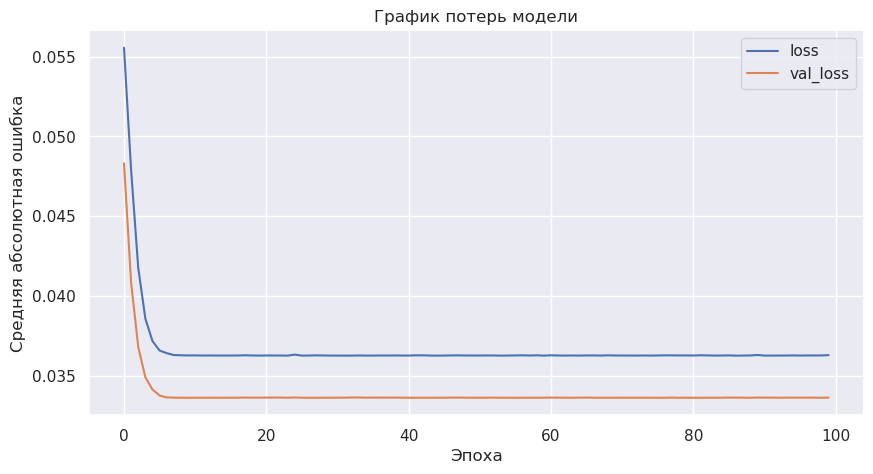

In [666]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График потерь модели', size=12)
plt.ylabel('Средняя абсолютная ошибка', size=12)
plt.xlabel('Эпоха', size=12)
plt.legend(['loss', 'val_loss'], loc='best')
plt.show()

In [553]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

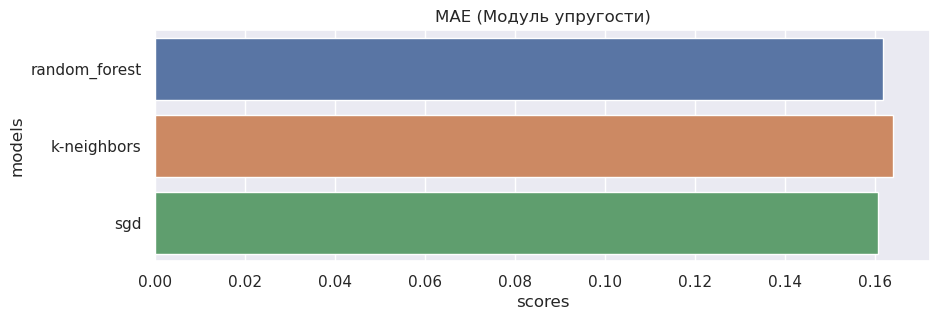

In [668]:
models = ['random_forest', 'k-neighbors', 'sgd']

# Модуль упругости
mae = pd.DataFrame({'models': models, 'scores': [ rf_elasticy_scores['mae'], kn_elasticy_scores['mae'], sgd_elasticy_scores['mae']]})

sns.set(rc={'figure.figsize': (10, 3)})
sns.barplot(x=mae['scores'], y=mae['models'], orient='h' ).set_title('MAE (Модуль упругости)')
plt.show()

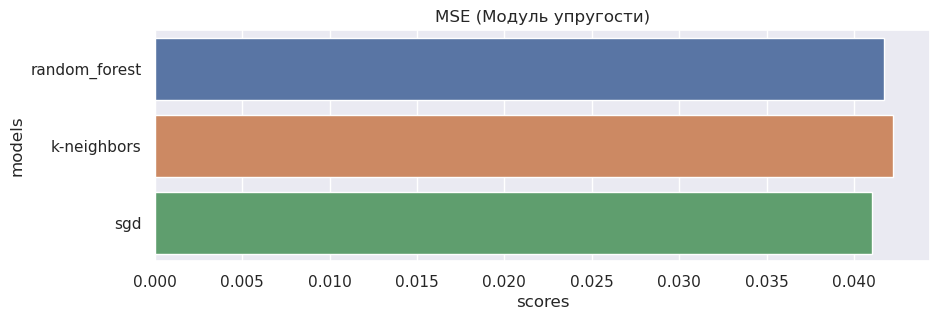

In [669]:
mse = pd.DataFrame({'models': models, 'scores': [rf_elasticy_scores['mse'], kn_elasticy_scores['mse'], sgd_elasticy_scores['mse']]})

sns.barplot(x=mse['scores'], y=mse['models'], orient='h').set_title('MSE (Модуль упругости)')
plt.show()

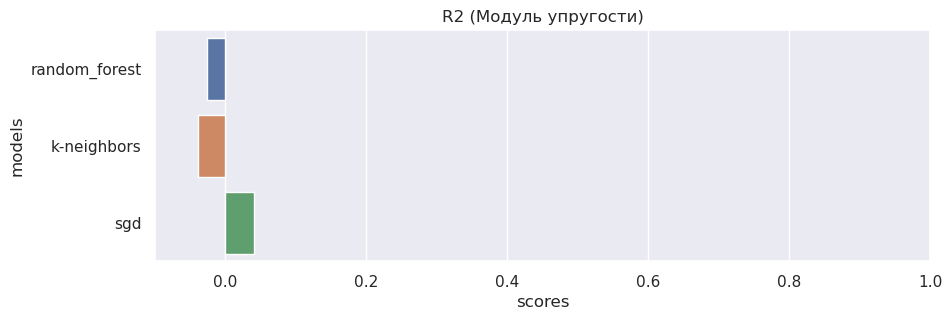

In [670]:
r2 = pd.DataFrame({'models': models, 'scores': [rf_elasticy_scores['r2'], kn_elasticy_scores['r2'], sgd_elasticy_scores['mse']]})

g = sns.barplot(x=r2['scores'], y=r2['models'], orient='h')
g.set_title('R2 (Модуль упругости)')
g.set_xlim(-0.1, 1)
plt.show()

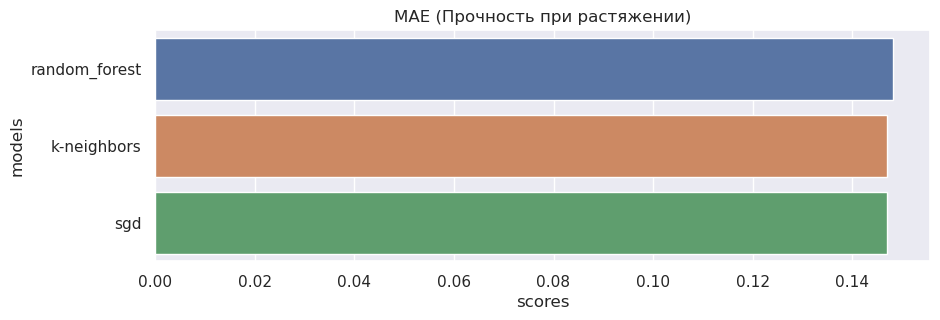

In [645]:
# прочность при расяжении


mae = pd.DataFrame({'models': models, 'scores': [ rf_strength_scores['mae'], kn_strength_scores['mae'], sgd_strength_scores['mae']]})

sns.set(rc={'figure.figsize': (10, 3)})
sns.barplot(x=mae['scores'], y=mae['models'], orient='h' ).set_title('MAE (Прочность при растяжении)')
plt.show()


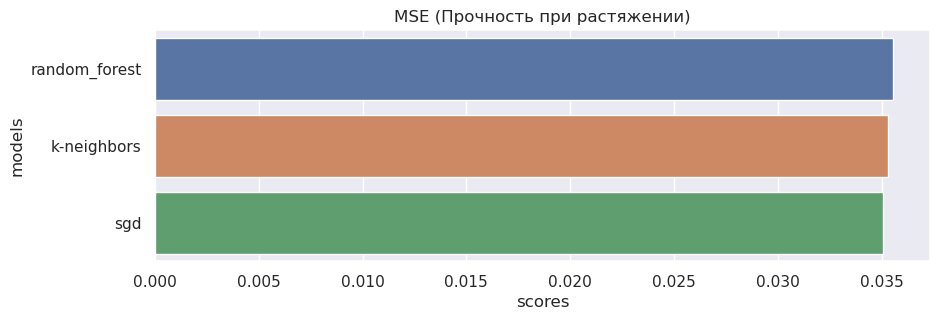

In [646]:
mse = pd.DataFrame({'models': models, 'scores': [rf_strength_scores['mse'], kn_strength_scores['mse'], sgd_strength_scores['mse']]})

sns.barplot(x=mse['scores'], y=mse['models'], orient='h').set_title('MSE (Прочность при растяжении)')
plt.show()

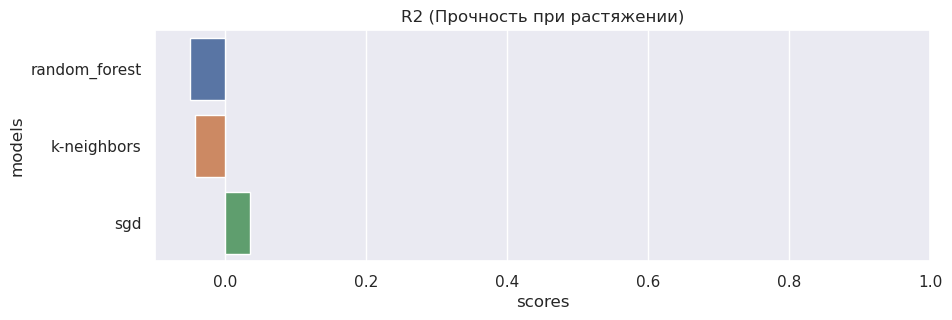

In [647]:
r2 = pd.DataFrame({'models': models, 'scores': [rf_strength_scores['r2'], kn_strength_scores['r2'], sgd_strength_scores['mse']]})

g = sns.barplot(x=r2['scores'], y=r2['models'], orient='h')
g.set_title('R2 (Прочность при растяжении)')
g.set_xlim(-0.1, 1)
plt.show()